In [3]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Reading the file
import pandas as pd

df = pd.read_csv('C:\\Users\\elhaw\\JupyterLab Projects\\Final Project\\fifa19.csv')

# Check for columns with high percentage of missing values
missing_data = df.isnull().mean() * 100
columns_with_missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Drop columns with more than 50% missing values
df = df.drop(columns=columns_with_missing_data[columns_with_missing_data > 50].index)

# Fill missing values in numeric columns with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Handle categorical columns by replacing missing values with the mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert date columns to DateTime format
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Ensure correct data types
df['club_jersey_number'] = df['club_jersey_number'].astype(float)

df['BMI'] = df['weight_kgs'] / (df['height_cm'] / 100) ** 2

In [16]:
import scipy.stats as stats

# Extract the primary position from the position list
df['primary_position'] = df['positions'].apply(lambda x: x.split(',')[0])

df['value_euro'] = pd.to_numeric(df['value_euro'], errors='coerce')

# Creating groups for ANOVA
groups = df.groupby('primary_position')['value_euro']

# Filter groups to include only those with sufficient data
valid_groups = [group.dropna() for name, group in groups if len(group.dropna()) > 1]

# Performing ANOVA
anova_result = stats.f_oneway(*valid_groups)

print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA test result: F-statistic = 23.200831911339858, p-value = 2.990613774247234e-60


In [23]:
import statsmodels.api as sm

X = df[['age', 'overall_rating', 'potential']]
y = df['value_euro']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X, missing='drop').fit()  # 'drop' option excludes any rows with missing data
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             value_euro   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     4897.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        05:14:12   Log-Likelihood:            -2.9924e+05
No. Observations:               17954   AIC:                         5.985e+05
Df Residuals:                   17950   BIC:                         5.985e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.326e+07   5.44e+05    -61.

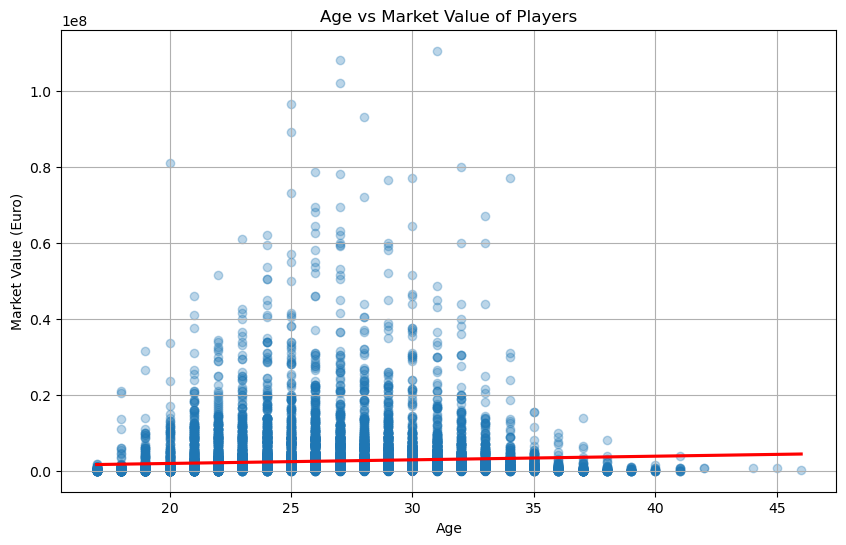

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='value_euro', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Age vs Market Value of Players')
plt.xlabel('Age')
plt.ylabel('Market Value (Euro)')
plt.grid(True)
plt.show()

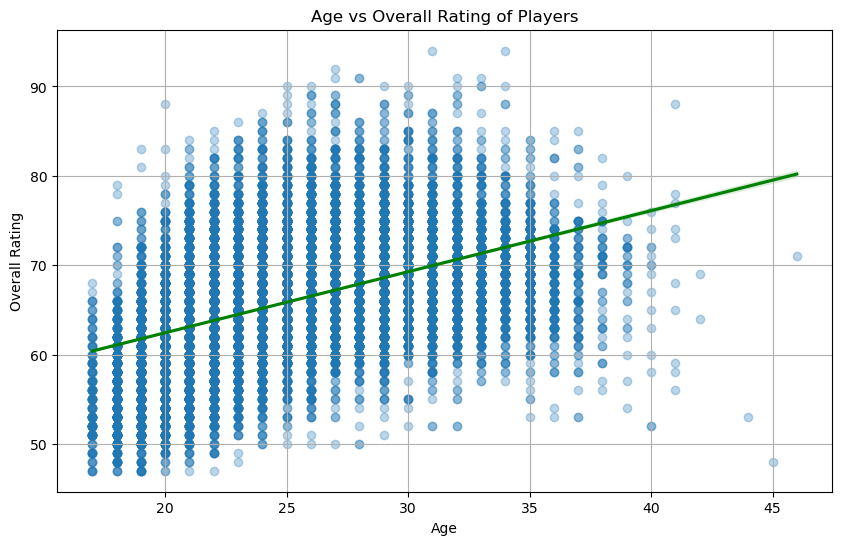

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='overall_rating', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Age vs Overall Rating of Players')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()

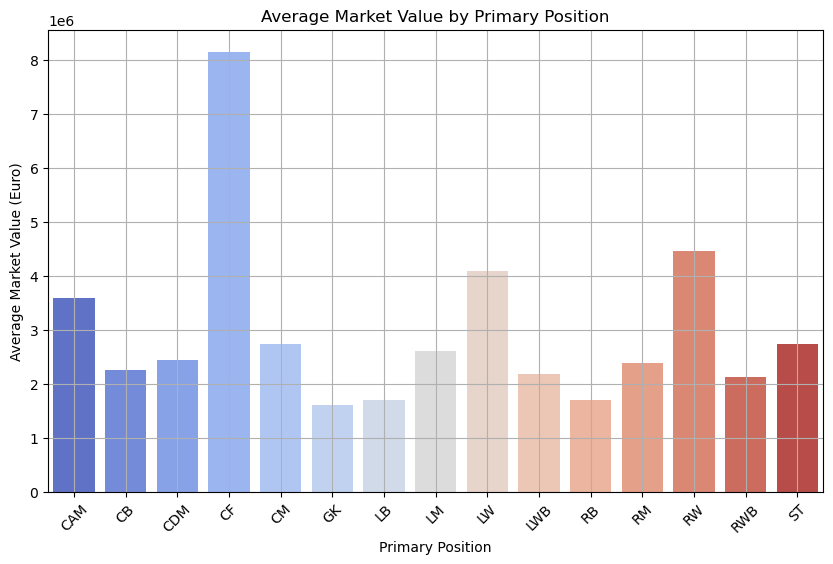

In [18]:
df['primary_position'] = df['positions'].apply(lambda x: x.split(',')[0])

position_means = df.groupby('primary_position')['value_euro'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='primary_position', y='value_euro', data=position_means, palette='coolwarm')
plt.title('Average Market Value by Primary Position')
plt.xlabel('Primary Position')
plt.ylabel('Average Market Value (Euro)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()